## 05 Image editing

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

def load_image(path):
    im = cv2.imread("./imgs/"+path)
    return im

def save_image(img, path):
    cv2.imwrite("./results/"+path, img)
    
def show_img(img):
    print(img[:3,:1,:])
    plt.figure(figsize=(6,10))
    f, ax = plt.subplots(1, 4, figsize=(22,6))
    ax[0].imshow(img[:,:,0])
    ax[0].axis("off")
    ax[1].imshow(img[:,:,1])
    ax[1].axis("off")
    ax[2].imshow(img[:,:,2])
    ax[2].axis("off")
    ax[3].imshow(img)
    ax[3].axis("off")
    plt.show()

    
def showLaplace(img):
    normed = np.zeros((img.shape))
    m = 0.0
    for c in range(img.shape[2]):
        if m < img[:,:,c].max():
            m = img[:,:,c].max()
    for c in range(img.shape[2]):
        #m = img[:,:,c].max()
        normed[:,:,c] = img[:,:,c]*(255.0/m)

    print(img[:,:,0].max())
    plt.figure(figsize=(6,10))
    plt.imshow(normed)
    plt.show()

In [2]:
one = load_image("original_mug_small.jpg")
two = load_image("no_teabag_small.jpg")
half1 = load_image("half_bag210.jpg")
half2 = load_image("half_nobag210.jpg")

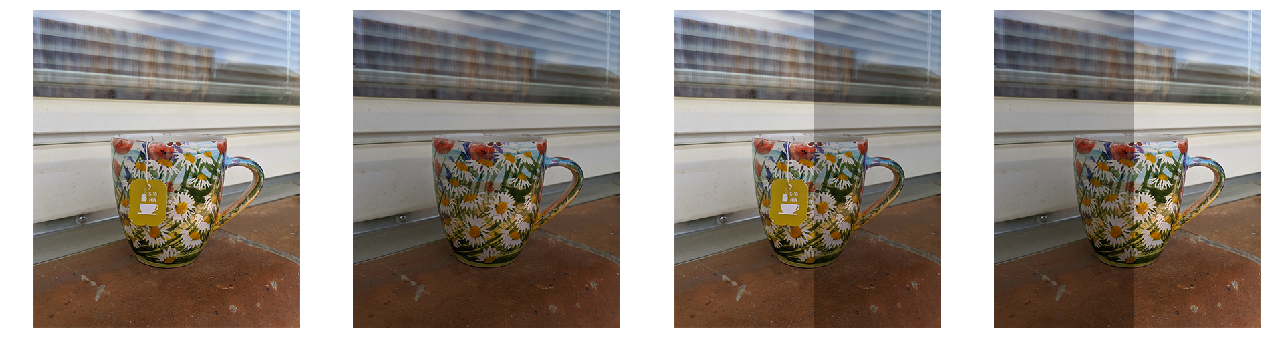

In [3]:
# Input photos
f, ax = plt.subplots(1, 4, figsize=(22,6))
ax[0].imshow(cv2.cvtColor(one, cv2.COLOR_BGR2RGB))
ax[0].axis("off")
ax[1].imshow(cv2.cvtColor(two, cv2.COLOR_BGR2RGB))
ax[1].axis("off")
ax[2].imshow(cv2.cvtColor(half1, cv2.COLOR_BGR2RGB))
ax[2].axis("off")
ax[3].imshow(cv2.cvtColor(half2, cv2.COLOR_BGR2RGB))
ax[3].axis("off")
plt.show()

### Gauss-Seidel

In [4]:
#
# I*[x,y] =  ( I[x+1,y] + I[x-1,y] + I[x,y+1], + I[x,y-1] - b[x,y]) / 4

# I*....new value in old matrix
# slow convergence
# border control

# faster on lower res -> reconstruction to original res

In [14]:
def Laplacian(im):
    im = im/255.
    n,m,c = im.shape
    laplacian = np.zeros((im.shape))
    kernel = [[0,1,0],[1,-4,1],[0,1,0]]
    k = 3
    half = k//2
    for color in range(c):
        for (x,y), pix in np.ndenumerate(im[:,:,color]):
            new_pix = 0.0

            for (k,l), val in np.ndenumerate(kernel):
                im_pos_x = abs(x-(k-half))
                im_pos_y = abs(y-(l-half))
                if(im_pos_x >= n):
                    im_pos_x += (n - im_pos_x - 1) 
                if(im_pos_y >= m):
                    im_pos_y += (m - im_pos_y - 1) 
                new_pix += im[im_pos_x,im_pos_y,color]*val
                
            laplacian[x,y,color] = new_pix                   
    return laplacian

def Laplacian_reduced(im):
    im = im/255.
    n,m,c = im.shape
    laplacian = np.zeros((im.shape))
    kernel1 = [[0,1,0],[1,-4,1],[0,1,0]]

    k = 3
    half = k//2
    for color in range(c):
        for (x,y), pix in np.ndenumerate(im[:,:,color]):
            new_pix = 0.0
            if(x>0 and y >0 and x<(n-1) and y <(m-1)):
                new_pix += im[x,y,color]*-4
                new_pix += im[x-1,y,color]*1
                new_pix += im[x+1,y,color]*1
                new_pix += im[x,y-1,color]*1
                new_pix += im[x,y+1,color]*1
                
            elif(x-1 < 0):
                if(y-1 < 0): #levy horni roh
                    new_pix += im[x,y,color]*-2
                    new_pix += im[x+1,y,color]*1
                    new_pix += im[x,y+1,color]*1
                elif(y+1 == m): #pravy horni roh
                    new_pix += im[x,y,color]*-2
                    new_pix += im[x+1,y,color]*1
                    new_pix += im[x,y-1,color]*1
                else: #horni hrana
                    new_pix += im[x,y,color]*-3
                    new_pix += im[x,y+1,color]*1
                    new_pix += im[x+1,y,color]*1
                    new_pix += im[x,y-1,color]*1
            elif(y-1 < 0):
                if(x+1 == n): #levy dolni roh
                    new_pix += im[x,y,color]*-2
                    new_pix += im[x-1,y,color]*1
                    new_pix += im[x,y+1,color]*1
                else: #leva
                    new_pix += im[x,y,color]*-3
                    new_pix += im[x-1,y,color]*1
                    new_pix += im[x+1,y,color]*1
                    new_pix += im[x,y+1,color]*1
            elif(y == m-1): #prava strana 
                if(x+1 == n): #pravy dolni roh
                    new_pix += im[x,y,color]*-2
                    new_pix += im[x-1,y,color]*1
                    new_pix += im[x,y-1,color]*1
                else: #prava
                    new_pix += im[x,y,color]*-3
                    new_pix += im[x-1,y,color]*1
                    new_pix += im[x+1,y,color]*1
                    new_pix += im[x,y-1,color]*1
                
            else:#dolni
                new_pix += im[x,y,color]*-3
                new_pix += im[x-1,y,color]*1
                new_pix += im[x,y-1,color]*1
                new_pix += im[x,y+1,color]*1
                
                
            laplacian[x,y,color] = new_pix                   
    return laplacian

In [18]:
lap_oner = Laplacian_reduced(one)
lap_one = Laplacian(one)
#lap_two = Laplacian(two)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


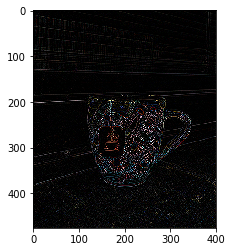

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


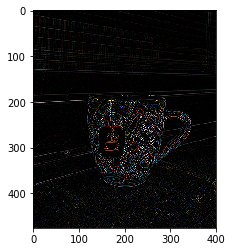

In [16]:
plt.imshow(lap_oner)
plt.show()
plt.imshow(lap_one)
plt.show()

In [ ]:
#laplacian mix using mask 
mask = load_image("mask_half4_small.jpg")/255.
lap_mix = np.zeros((lap_one.shape))
for color in range(lap_one.shape[2]):
    for (x,y), pix in np.ndenumerate(lap_one[:,:,color]):
        lap_mix[x,y,color] = np.sqrt(1.-mask[x,y,0])*(lap_one[x,y,color]) + np.sqrt(mask[x,y,0])*(lap_two[x,y,color])

In [ ]:
#laplacian mix for halved input
lap_mix1 = np.zeros((lap_one.shape))
lap_mix1[:,:210,:] = lap_one[:,:210,:]
lap_mix1[:,210:,:] = lap_two[:,210:,:]

lap_mix2 = np.zeros((lap_one.shape))
lap_mix2[:,:210,:] = lap_two[:,:210,:]
lap_mix2[:,210:,:] = lap_one[:,210:,:]

In [148]:
#using average color as input into GS
h,w,c = one.shape
avg_both = np.zeros((one.shape))
for color in range(c):
    a = one[:,:,color].mean()
    b = two[:,:,color].mean()
    for (x,y), pix in np.ndenumerate(one[:,:,color]):
        avg_both[x,y,color] = int((a+b)/2.)

In [122]:
def GaussSeidel(avg_img, laplacian, k=1000, new_input = True):
    if(new_input):
        avg_img = avg_img/255.
        
    inp = avg_img.copy()
    h,w,c = laplacian.shape
    for i in range(k):
        for color in range(laplacian.shape[2]):
            for (x,y), pix in np.ndenumerate(laplacian[:,:,color]):
                
                if(x+1 < h):
                    a = avg_img[x+1,y,color]
                else:
                    a = inp[x,y-1,color] #y-1
                
                
                if(x-1 > 0):
                    b = avg_img[x-1,y,color]
                else:
                    b = inp[x,y,color] # #horni strana
                 
                if(y+1 < w): #prava strana
                    c = avg_img[x,y+1,color]
                else:
                    c = inp[x,y,color]#good!!?
                    
                if(y-1 > 0): #leva strana
                    d = avg_img[x,y-1,color] 
                else:
                    d = inp[x,y+1,color] #y+2 fixed
                
                # I*[x,y] =  ( I[x+1,y] + I[x-1,y] + I[x,y+1], + I[x,y-1] - b[x,y]) / 4
                avg_img[x,y,color] = (a + b + c+ d - pix)/4.       
    return avg_img

### Multi-resolution scheme

In [63]:
# 
def laplacian_mixed(in1,in2):
    lap_one = Laplacian_reduced(in1)
    lap_two = Laplacian_reduced(in2)
    lap_mix2 = np.zeros((lap_one.shape))
    
    line = int(in1.shape[1]*0.525)
    print("Predel:",line)
    lap_mix2[:,:line,:] = lap_two[:,:line,:]
    lap_mix2[:,line:,:] = lap_one[:,line:,:]
    return lap_mix2

In [64]:
def scale_im(img, rate):
    width = int(img.shape[1] *  rate)
    if(width%2==1):
        width+=1
    height = int(img.shape[0] * rate)
    if(height%2==1):
        height+=1
    return cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA)

In [202]:
def faster_GS(in1,in2, input_gs,results,k):
    # get mixed laplace
    lp = laplacian_mixed(in1,in2)
    if(lp.shape[1] < 200):
        print(in1.shape)
        results.append(GaussSeidel(input_gs, lp, k, new_input = True))
        return results, lp
    
    # scale down
    sm1 = scale_im(in1,0.5)
    sm2 = scale_im(in2,0.5)
    ig = scale_im(input_gs,0.5)
    #recursion
    results, l = faster_GS(sm1, sm2,ig,results,k)
    product = results[-1]
    # scale up
    product_up = scale_im(product,2)
    product_up = product_up[:lp.shape[0],:lp.shape[1],:]
    print(product_up.shape, lp.shape)
    results.append(GaussSeidel(product_up, lp, k, new_input = False))
    return results, lp

#### Runs

In [203]:
k=50
results, vzor = faster_GS(two, one,half2, [], k)

Predel: 210
Predel: 105
Predel: 52
(120, 100, 3)
(238, 200, 3) (238, 200, 3)
(476, 400, 3) (476, 400, 3)


In [204]:
for r in results:
    normedI = np.zeros((r.shape))
    a = 0.0
    for color in range(r.shape[2]):
        if a < r[:,:,color].max():
            a = r[:,:,color].max()
    for color in range(r.shape[2]):
        for (x,y), pix in np.ndenumerate(r[:,:,color]):
            normedI[x,y,color] = (r[x,y,color]/a)*255.0
            
    save_image(normedI,"resultsadd-"+str(k)+"iterations-5levels"+str(r.shape[0])+".jpg")

    
for r in [vzor]:
    normedI = np.zeros((r.shape))
    a = 0.0
    for color in range(r.shape[2]):
        if a < r[:,:,color].max():
            a = r[:,:,color].max()
    for color in range(r.shape[2]):
        for (x,y), pix in np.ndenumerate(r[:,:,color]):
            normedI[x,y,color] = (r[x,y,color]/a)*255.0
            
    save_image(normedI,"vzoradd-"+str(k)+"iterations-5levels"+str(r.shape[0])+".jpg")

    